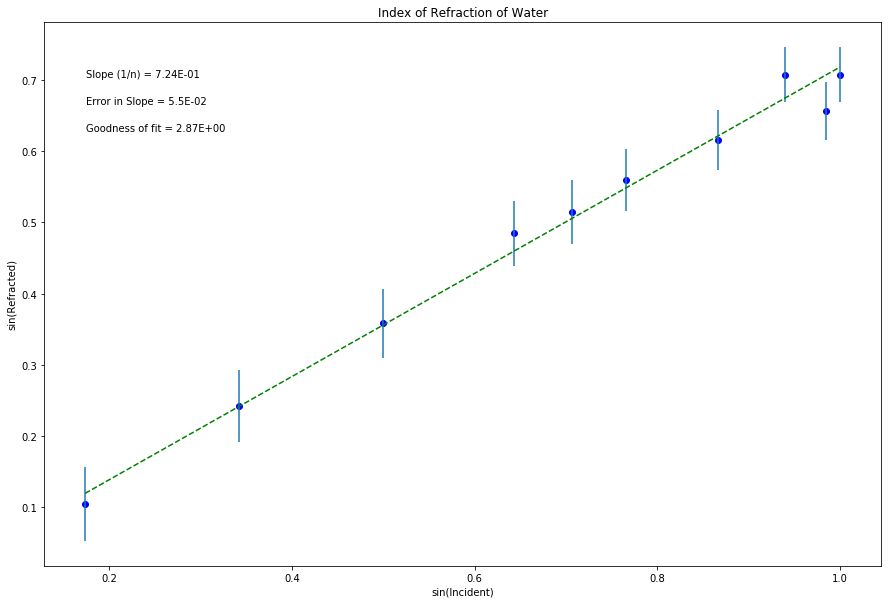

In [6]:
#Physics 218
#Jaylene Naylor

#Modified by Alexander West
#Lab 8: Magnetic Fields

#-------------------------------------------#
%matplotlib inline

#Import packages and libraries needed and give them shortcut names

import numpy as np
import matplotlib.pyplot as plt

#-------------------------------------------#
#Data Section - Create Arrays for data. Perform necessary calculations
#CHANGE THE VARIABLE NAMES and numbers to match your data
thetaI = np.sin(np.array([10,20,30,40,45,50,60,70,80,90])*np.pi/180) # Sin of Incident Angle
thetaR = np.sin(np.array([6,14,21,29,31,34,38,45,41,45])*np.pi/180) # Sin of Refracted Angle


#--------------------------------------------#
#Create arrays for uncertainties
#CHANGE THE VARIABLE NAME and numbers to match your data 
dt = 3*np.pi/180
thetaRErr = np.array([np.sin(thetaR[0]+dt)-np.sin(thetaR[0]),np.sin(thetaR[1]+dt)-np.sin(thetaR[1]),np.sin(thetaR[2]+dt)-np.sin(thetaR[2]),np.sin(thetaR[3]+dt)-np.sin(thetaR[3]),np.sin(thetaR[4]+dt)-np.sin(thetaR[4]),np.sin(thetaR[5]+dt)-np.sin(thetaR[5]),np.sin(thetaR[6]+dt)-np.sin(thetaR[6]),np.sin(thetaR[7]+dt)-np.sin(thetaR[7]),np.sin(thetaR[8]+dt)-np.sin(thetaR[8]),np.sin(thetaR[9]+dt)-np.sin(thetaR[9])])


#--------------------------------------------#
#Re-assign variables as x, y, dy so that the following code may remain generic

x = thetaI   #this should be the array you want to plot on the x axis
y = thetaR
dy = thetaRErr  #this should be your error in y array

#----------------------------------------------#
#Don't need to change anything in this section!
 
#Find the intercept and slope, b and m, from Python's polynomial fitting function
b,m=np.polynomial.polynomial.polyfit(x,y,1,w=dy)

#Write the equation for the best fit line based on the slope and intercept
fit = b+m*x

#Calculate the error in slope and intercept 
#def Delta(x, dy) is a function, and we will learn how to write our own at a later date. They are very useful!
def Delta(x, dy):
    D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
    return D
 
D=Delta(x, dy)
 
dm = np.sqrt(1/D*sum(1/dy**2)) #error in slope
db = np.sqrt(1/D*sum(x**2/dy**2)) #error in intercept

#Calculate the "goodness of fit" from the linear least squares fitting document
def LLSFD2(x,y,dy):
    N = sum(((y-b-m*x)/dy)**2)
    return N
                      
N = LLSFD2(x,y,dy)

#-----------------------------------------------------------------------#
#Plot data on graph. Plot error bars and place values for slope, error in slope
#and goodness of fit on the plot using "annotate"

plt.figure(figsize=(15,10))
 
plt.plot(x, fit, color='green', linestyle='--')
plt.scatter(x, y, color='blue', marker='o')
 
 
#create labels  YOU NEED TO CHANGE THESE!!!
plt.xlabel('sin(Incident)')
plt.ylabel('sin(Refracted)')
plt.title('Index of Refraction of Water')
 
plt.errorbar(x, y, yerr=dy, xerr=None, fmt="none") #don't need to plot x error bars
 
plt.annotate('Slope (1/n) = {value:.{digits}E}'.format(value=m, digits=2),
             (0.05, 0.9), xycoords='axes fraction')
 
plt.annotate('Error in Slope = {value:.{digits}E}'.format(value=dm, digits=1),
             (0.05, 0.85), xycoords='axes fraction')
 
plt.annotate('Goodness of fit = {value:.{digits}E}'.format(value=N, digits=2),
             (0.05, 0.80), xycoords='axes fraction')

plt.show()
